In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:

import gdown

# Google Drive file URLs and output file names
files_to_download = {
    "https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing": "Customers.csv",
    "https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing": "Products.csv",
    "https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing": "Transactions.csv"
}

# Function to extract file ID and download
def download_from_drive(url, output):
    file_id = url.split('/d/')[1].split('/view')[0]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(download_url, output, quiet=False)

# Download each file
for url, output in files_to_download.items():
    download_from_drive(url, output)

print("Files downloaded successfully!")


Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 14.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 3.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 51.5MB/s]

Files downloaded successfully!


In [34]:
# Read CSV files

customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Check data shapes
print("Customers shape:", customers_df.shape)
print("Products shape:", products_df.shape)
print("Transactions shape:", transactions_df.shape)

# Quick glance
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())


Customers shape: (200, 4)
Products shape: (100, 4)
Transactions shape: (1000, 7)
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1  

In [35]:
# Merge Transactions with Customers and Products for broader analysis
transactions_merged = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
transactions_merged = pd.merge(transactions_merged, products_df, on="ProductID", how="left")

# Check for missing values
print("Missing values in merged data:")
print(transactions_merged.isnull().sum())

# Convert dates to datetime if not already
transactions_merged['TransactionDate'] = pd.to_datetime(transactions_merged['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# A glance at merged transactions
transactions_merged.head()


Missing values in merged data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


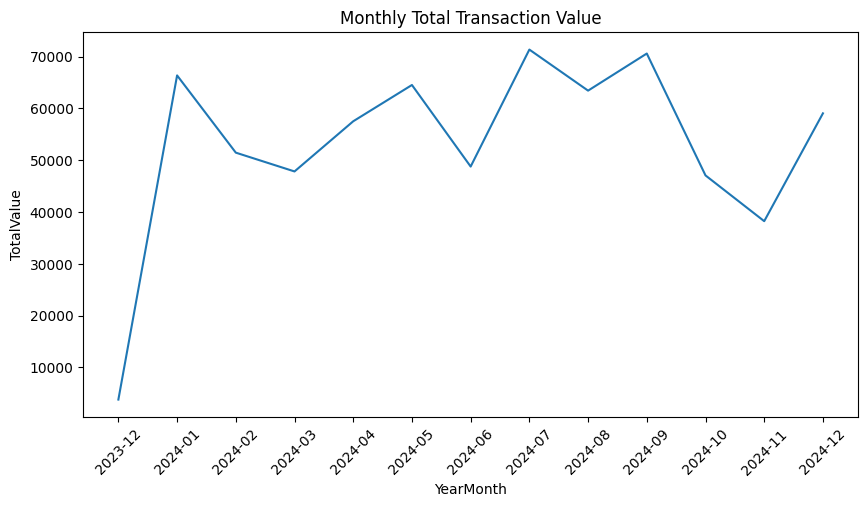

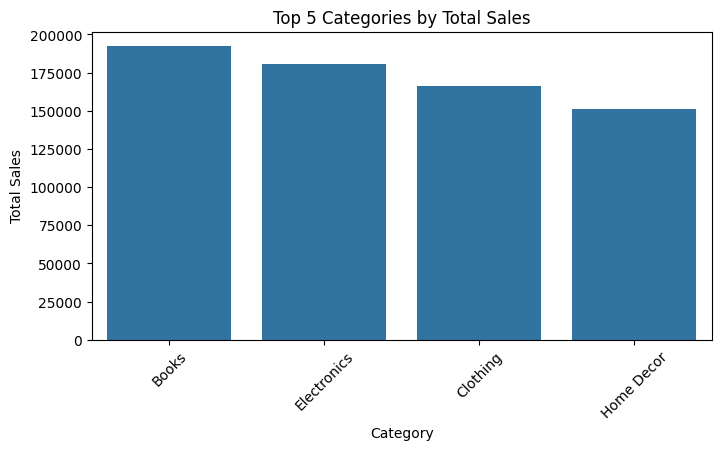

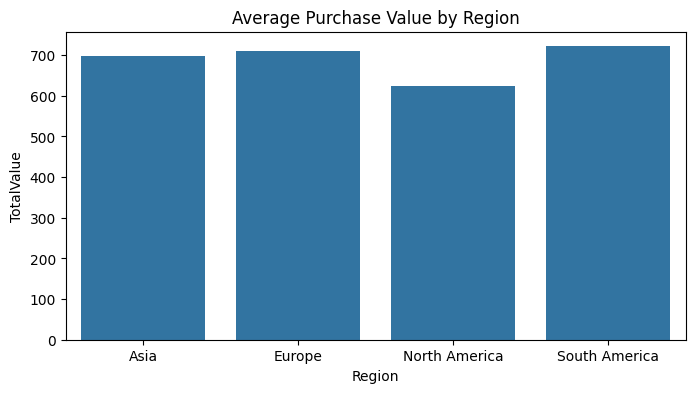

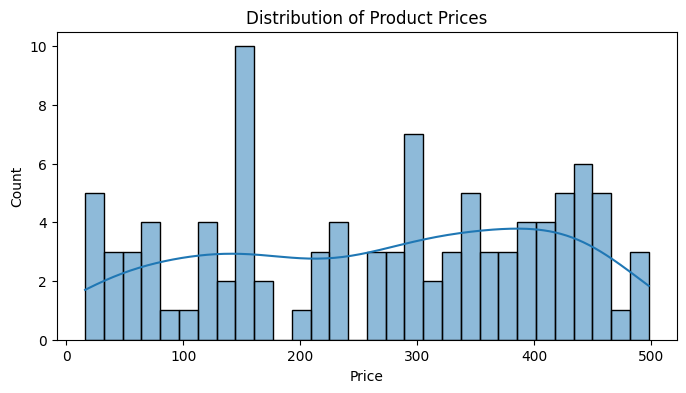

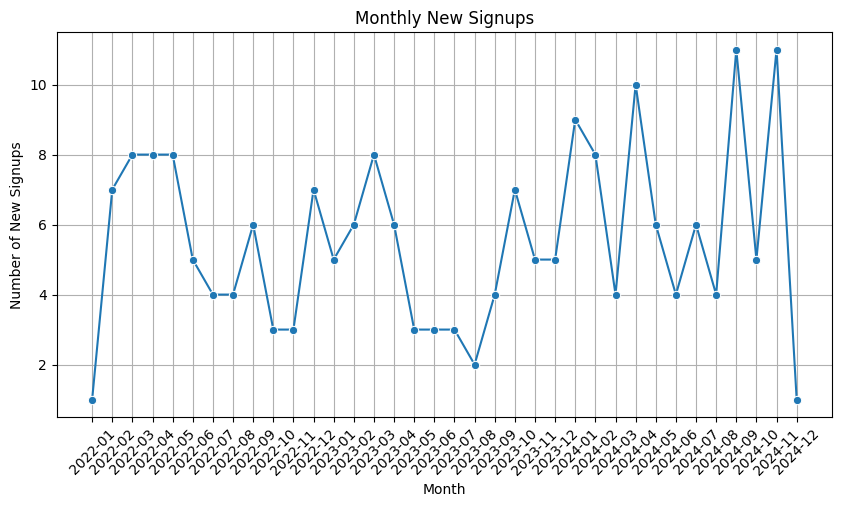

In [36]:
# Transactions Over Time
transactions_merged['YearMonth'] = transactions_merged['TransactionDate'].dt.to_period('M').astype(str)
tx_per_month = transactions_merged.groupby('YearMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=tx_per_month, x="YearMonth", y="TotalValue")
plt.title("Monthly Total Transaction Value")
plt.xticks(rotation=45)
plt.show()

# Top 5 Categories by Total Sales
category_sales = transactions_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_5_categories = category_sales.head(5)
plt.figure(figsize=(8,4))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.title("Top 5 Categories by Total Sales")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()

# Average Purchase Value by Region
region_avg_purchase = transactions_merged.groupby('Region')['TotalValue'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=region_avg_purchase, x='Region', y='TotalValue')
plt.title("Average Purchase Value by Region")
plt.show()

# Distribution of Product Prices
plt.figure(figsize=(8,4))
sns.histplot(products_df['Price'], kde=True, bins=30)
plt.title("Distribution of Product Prices")
plt.show()

# Customer Signup Trend Over Time
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M').astype(str)
signup_trend = customers_df.groupby('SignupMonth')['CustomerID'].count().reset_index()

# Rename columns for clarity
signup_trend.rename(columns={'CustomerID': 'NumSignups'}, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=signup_trend, x="SignupMonth", y="NumSignups", marker="o")
plt.title("Monthly New Signups")
plt.xlabel("Month")
plt.ylabel("Number of New Signups")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
